# Fiona O'Riordan 29 November 2019

## Module 52446 2019 Fundamentals of Data Analysis  

## Assignment: Tips


## 1. Introduction

This repository, 52446_tips_19 , is my submission for Project 2019, module 52446 Fundamentals of Data Analysis. The project is an exploration and analysis of the python seaborn tips data set using the python packages seaborn and jupyter notebook.[1] 

The project begins with background information on the tips dataset. An Exploratory Data Analysis section will describe the tips data using descriptive statistics and plots. The next section **subtitle** will focus on wether there is a relationship between the total bill and tip amount within the data set. Then, an analysis of relationship between the variables within the dataset will performed. A summary of the key findings will be listed. Lastly, appropriate references used throughout will be documented.

## 2. An Exploratory Data Analysis of the Tips Dataset.

### 2.1 Load the data

First lets load the seaborn tips database.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Taken from : https://stackoverflow.com/a/47955814 
# Adjusting the figure size of seaborn plots in this notebook
# sns.set(rc={'figure.figsize':(20,10)})
df = sns.load_dataset('tips')


### 2.2 Explore the data

Now we can begin to explore the data. We can see from the info function that we have 244 entries and 7 columns in the dataset. The first two columns, 'total_bill' and 'tip' are datatype float64. Columns 'sex', 'smoker', 'day' and 'time' are all category columns. The last column 'size' has datatype int64.  All of the columns are non-null. The Index ranges from 0 to 243.

In [2]:
(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


### 2.2 A quick look

The function df.head() shows us the fist 5 entries in the database. 

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Similarly, the function df.tail() shows us the last 5 entries in the database.

In [4]:
df.tail()


,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


The describe function gives us a statistical overview of the database for each of the numerical columns. We can see that we have 244 entries. This function calulates the mean, standard deviation, minimum, ....for each of these columns.

In [5]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
# Adapted from 
df.groupby('sex')['tip'].describe().unstack(1)


       sex   
count  Male      157.000000
       Female     87.000000
mean   Male        3.089618
       Female      2.833448
std    Male        1.489102
       Female      1.159495
min    Male        1.000000
       Female      1.000000
25%    Male        2.000000
       Female      2.000000
50%    Male        3.000000
       Female      2.750000
75%    Male        3.760000
       Female      3.500000
max    Male       10.000000
       Female      6.500000
dtype: float64

In [7]:
(df.loc[df.loc[:,'sex']=='Male']).describe()

,total_bill,tip,size
count,157.000000,157.000000,157.000000
mean,20.744076,3.089618,2.630573
std,9.246469,1.489102,0.955997
min,7.250000,1.000000,1.000000
25%,14.000000,2.000000,2.000000
50%,18.350000,3.000000,2.000000
75%,24.710000,3.760000,3.000000
max,50.810000,10.000000,6.000000


In [8]:
(df.loc[df.loc[:,'sex']=='Female']).describe()

,total_bill,tip,size
count,87.000000,87.000000,87.000000
mean,18.056897,2.833448,2.459770
std,8.009209,1.159495,0.937644
min,3.070000,1.000000,1.000000
25%,12.750000,2.000000,2.000000
50%,16.400000,2.750000,2.000000
75%,21.520000,3.500000,3.000000
max,44.300000,6.500000,6.000000


For lunch both sex's tend to be almost equally likely to be the bill payer.  However, at dinner, men are more likely to be the bill payer.

# When was the restaurant busiest?

### Lunchtime Thursday: 
The busiest day for lunch was Thursday with 61 tables served and 150 diners. In comparision, Friday was a quiet day for lunch with only 7 tables servered and 14 diners. At the weekend, either no customers appeared for lunch or lunch was not served. 
### Dinnertime Weekend: 
The Thursday and Friday were very quite days for dinner with only 1 table, 2 diners and 12 tabels, 26 diners respectively.  In comparision the weekend was very busy for dinner with 87 tables, 219 diners on Saturday evening and 76 tables, 216 diners on Sunday.

 

In [9]:
# Adapted from https://stackoverflow.com/a/17679980
# Calulate the number of tables served by day, time.
df.groupby(['day','time']).size()

day   time  
Thur  Lunch     61
      Dinner     1
Fri   Lunch      7
      Dinner    12
Sat   Dinner    87
Sun   Dinner    76
dtype: int64

In [10]:
# https://stackoverflow.com/a/43529134
# Create a pivot table to calulate the number of diners by day & time.

num_diners_bysitting = pd.pivot_table(df, index=['day'],columns = ['time'],values=['size'],\
                      aggfunc=sum, margins=True)

num_diners_bysitting


size            
time  Lunch Dinner  All
day                    
Thur  150.0    2.0  152
Fri    14.0   26.0   40
Sat     NaN  219.0  219
Sun     NaN  216.0  216
All   164.0  463.0  627

In [11]:
# Adapted from https://stackoverflow.com/questions/22391433/count-the-frequency-that-a-value-occurs-in-a-dataframe-column/36434248
df['size'].value_counts()

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64

# What was the most frequent party size?

## Two's Company
Overall, by far the most frequent party size was 2 at both lunch time and dinner . The next most popular party size was 3 and then 4. The remaining party size 1, 5 and 6 were relatively infrequent. See figure "Party Size at Lunch & Dinner":

Text(0.5, 0.98, 'Party Size at Lunch & Dinner')

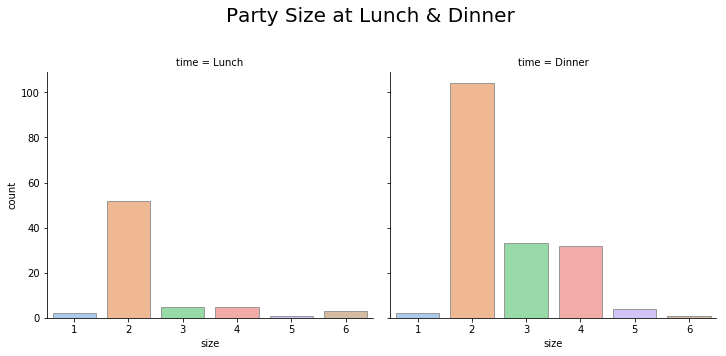

In [12]:

#Creating a figure ax using seaborn category plot function 
ax = sns.catplot(x="size", kind="count",
            palette="pastel", edgecolor=".6", col = "time",
            data=df);

#Adapted from :https://stackoverflow.com/a/42030162 to adjust the title up a little
ax.fig.subplots_adjust(top=0.8)
# Adding a figure title with fontsize 20
ax.fig.suptitle("Party Size at Lunch & Dinner", fontsize = 20)




In addition, regardless of the day & time, the most popular table/party size was 2 as figure 'Party size for each Day & Time' shows:

Text(0.5, 0.98, 'Party size for each Day & Time')

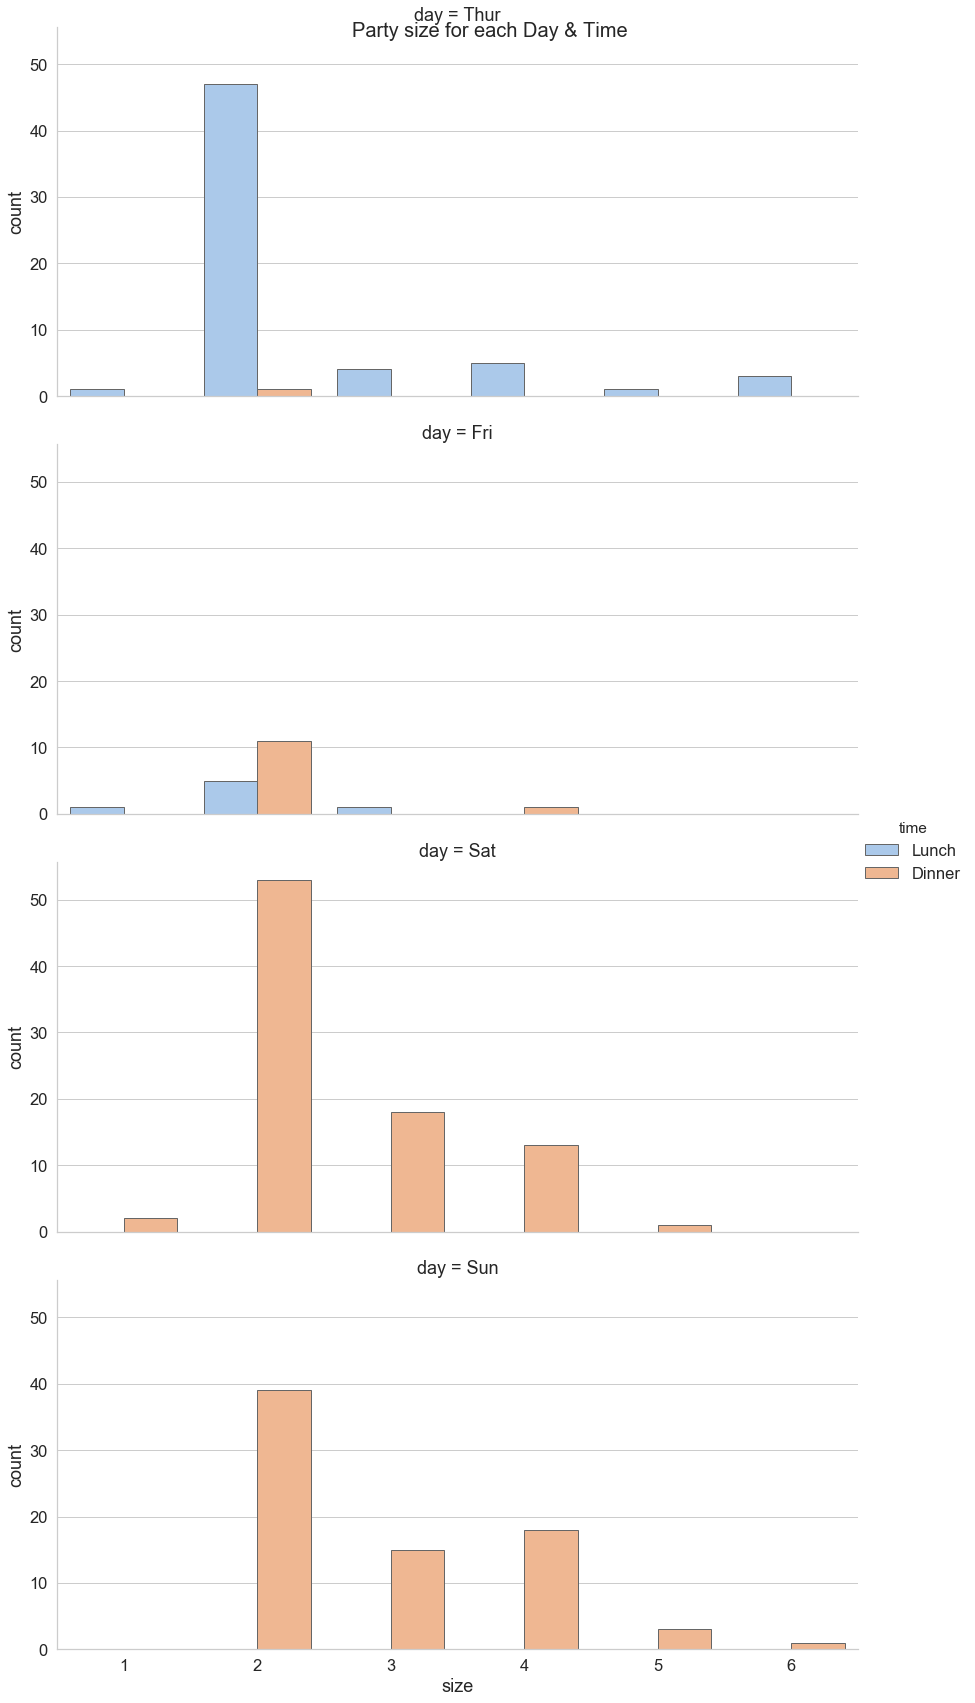

In [51]:

ax1 = sns.catplot (x="size", hue="time", kind="count",
            palette="pastel", edgecolor=".4", row = "day", height=6, aspect=2,
            data=df);

sns.set(style="whitegrid", font_scale=1.5)
#Adapted from :https://stackoverflow.com/a/42030162 to adjust the title up a little
ax.fig.subplots_adjust(top=0.2)

# Adding a title
ax1.fig.suptitle("Party size for each Day & Time", fontsize = 20)



The underlying data in 'Party size for each Day & Time' is shown as a table:

In [15]:
# Adapted from https://stackoverflow.com/a/28648923
# Calculate the total number of covers by size (diners served)


df.groupby(['day','time','size']).size()


day   time    size
Thur  Lunch   1        1
              2       47
              3        4
              4        5
              5        1
              6        3
      Dinner  2        1
Fri   Lunch   1        1
              2        5
              3        1
      Dinner  2       11
              4        1
Sat   Dinner  1        2
              2       53
              3       18
              4       13
              5        1
Sun   Dinner  2       39
              3       15
              4       18
              5        3
              6        1
dtype: int64

In fact, as the following calulation and pie chart so succintly show, almost two thirds of the total covers were for parties of 2:

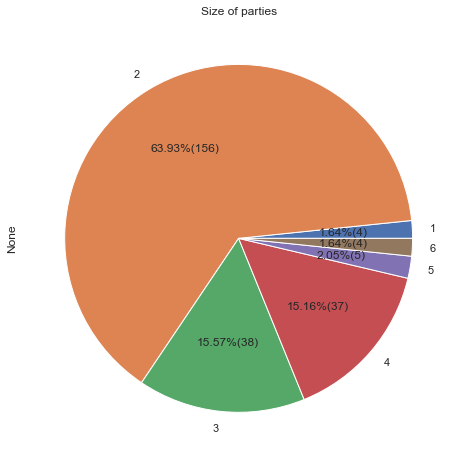

In [17]:
# Adapted from https://stackoverflow.com/a/54087182

import pandas as pd
import matplotlib.pyplot as plt

dfsize = df.groupby('size').size()

sns.set()
dfsize.plot(# create a pie chart
            kind='pie', 
            # set the title of the pie chart
            title='Size of parties', 
            # figure size
            figsize=[8,8], 
            # with the percent listed as a fraction
            autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*dfsize.sum()))
plt.show()


So almost two thirds of the business is made up of party sizes of 2.  Lets look at the data assiociated with parties of 2 then.